<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Batch Normalization with the MNIST Dataset</h1>


<h2>Table of Contents</h2>
In this lab, you will build a Neural Network using Batch Normalization and compare it to a Neural Network that does not use Batch Normalization. You will use the MNIST dataset to test your network. 

<ul>
<li><a href="#Preparation">Preparation</a></li>    
<li><a href="#Train_Func">Neural Network Module and Training Function</a></li>
<li><a href="#Makeup_Data">Make Some Data</a></li>
<li><a href="#NN">Define Several Neural Networks, Criterion function, Optimizer</a></li>
<li><a href="#Train">Train Neural Network using Batch Normalization and no Batch Normalization</a></li>
<li><a href="#Result">Analyze Results</a></li>
</ul>
</div>

<hr>


<a name="Preparation"><h2>Preparation</h2></a>


In [1]:
# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import matplotlib.pylab as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F

torch.manual_seed(0)

<a name="Train_Func"><h2 id="Train_Func">Neural Network Module and Training Function</h2></a>


 Neural Network Module with two hidden layers using Batch Normalization


In [2]:
# Define the Neural Network Model using Batch Normalization

class NetBatchNorm(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        
    # Prediction
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x
    
    # Activations, to analyze results
    def activation(self, x):
        out = []
        z1 = self.bn1(self.linear1(x))
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.bn2(self.linear2(a1))
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

In [3]:
# Class Net for Neural Network Model without Batch Normalization

class Net(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):

        super(Net, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x
    
    # Activations, to analyze results
    def activation(self, x):
        out = []
        z1 = self.linear1(x)
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.linear2(a1)
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

In [4]:
# Define the function to train model

def train(model, criterion, train_loader,
          validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            model.eval()
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<a name="Makeup_Data"><h2 id="Makeup_Data">Make Some Data</h2></a>


In [5]:
# load train dataset
train_dataset = dsets.MNIST(root = './data', train = True, download = True,
                            transform = transforms.ToTensor())

# load validation dataset
validation_dataset = dsets.MNIST(root = './data', train = False,
                                 download = True, transform = transforms.ToTensor())

In [6]:
# Create Data Loader for both train and validating datasets

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 2000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, 
                                                batch_size = 5000, shuffle = False)

<a id="ref3"></a>
<a name="NN"><h2 align=center>Define Neural Network, Criterion function, Optimizer and Train the  Model  </h2></a>


In [7]:
# Create criterion function

criterion = nn.CrossEntropyLoss()

In [8]:
# Set the parameters

input_dim = 28 * 28
hidden_dim = 100 # number of neurons in each hidden layer
output_dim = 10

<a name="Train"><h2 id="Train">Train Neural Network using Batch Normalization and no Batch Normalization </h2></a>


Train Neural Network using  Batch Normalization :


In [9]:
# Create model, optimizer and train the model

model_norm  = NetBatchNorm(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)
training_results_Norm = train(model_norm, criterion,
                              train_loader, validation_loader, optimizer, epochs = 5)

In [10]:
# Create model w/out Batch Normalization, optimizer and train the model

model = Net(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, criterion,
                         train_loader, validation_loader, optimizer, epochs = 5)

<a name="Result"><h2 id="Result">Analyze Results</h2></a>


Compare the histograms of the activation for the first layer of the first sample, for both models.


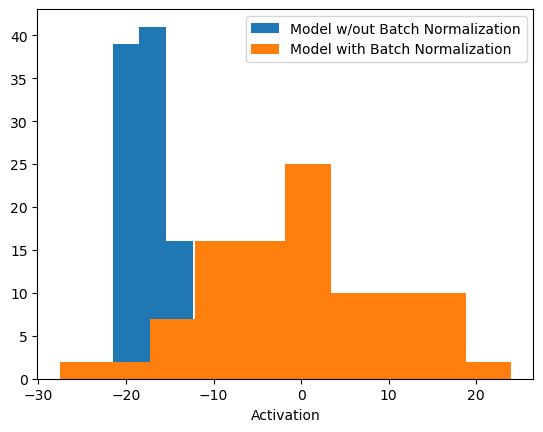

In [11]:
model.eval()
model_norm.eval()

out = model.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out[2], label = 'Model w/out Batch Normalization')

out_norm = model_norm.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out_norm[2], label = 'Model with Batch Normalization')
plt.xlabel('Activation')
plt.legend()
plt.show()

- **Activations with Batch Normalization are zero centred and have a smaller variance.**

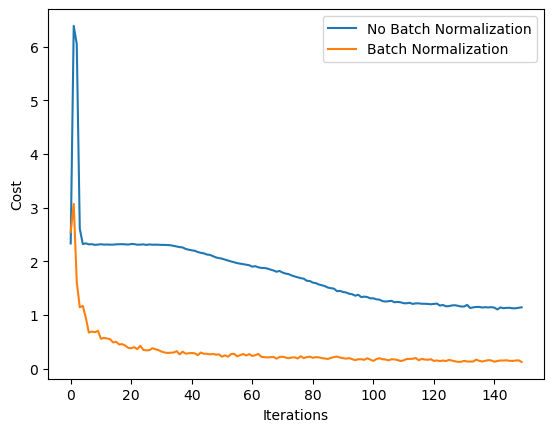

In [12]:
# Plot diagram to compare training loss for each iteration

plt.plot(training_results['training_loss'], label = 'No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label = 'Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.legend()
plt.show()

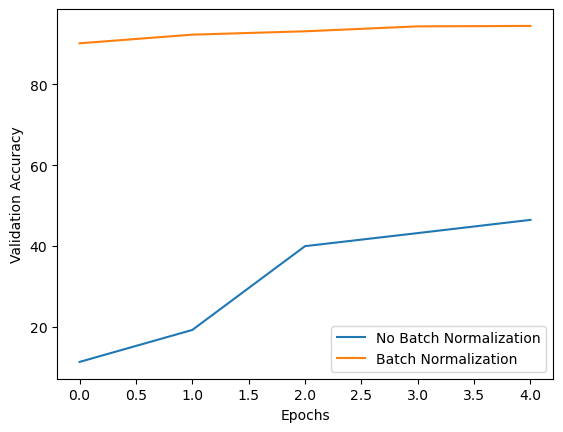

In [13]:
# Plot diagram to compare the validating accuracy for each iteration

plt.plot(training_results['validation_accuracy'], label = 'No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'], label = 'Batch Normalization')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()